In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## 1. Generation of the 3 datasets

In [6]:
X1, Y1 = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
X2, Y2 = make_blobs(n_samples=10000, n_features=2, centers=3) # Kmeans = linéaire
X3, Y3 = make_moons(n_samples=10000, shuffle=True, noise=None, random_state=None)

## 3. Splitting the data sets

In [7]:
X1_1,Y1_1 = X1[:5000],Y1[:5000]
X1_v,Y1_v = X1[5000:],Y1[5000:]
X2_1,Y2_1 = X2[:5000],Y2[:5000]
X2_v,Y2_v = X2[5000:],Y2[5000:]
X3_1,Y3_1 = X3[:5000],Y3[:5000]
X3_v,Y3_v = X3[5000:],Y3[5000:]

## 4. Finding optimal parameter of SVM data sets with a 2 - Kfold

In [8]:
def Kfold(n,X,Y):
    name = ['rbf','linear','poly']
    accuracy = []
    Cv = []
    kernel =[]
    for i in name:
        for p in np.arange(0.1,10.1,0.1):
            model = svm.SVC(C=p, kernel=i,gamma='auto')
            model.fit(X,Y)
            score = cross_val_score(model, X, Y, cv=n,scoring='accuracy')
            accuracy.append(np.mean(score))
            Cv.append(p)
            kernel.append(i)
    print(np.array(accuracy),np.array(Cv),np.array(kernel))
    return (max(accuracy),kernel[accuracy.index(max(accuracy))],Cv[accuracy.index(max(accuracy))])

In [9]:
Ac1, K1,C1 = (Kfold(2,X1_1,Y1_1))
print(Ac1,K1,C1)

[0.924  0.9292 0.9332 0.9362 0.9384 0.9394 0.9402 0.9406 0.9414 0.9418
 0.9424 0.9432 0.944  0.9438 0.9444 0.9444 0.9444 0.9444 0.9446 0.9448
 0.9454 0.9456 0.9462 0.9468 0.9468 0.9468 0.9468 0.947  0.9472 0.9474
 0.9474 0.9474 0.9474 0.9474 0.9474 0.9474 0.948  0.9482 0.9482 0.9482
 0.9482 0.9484 0.9484 0.9484 0.9484 0.9484 0.9486 0.9488 0.949  0.9492
 0.9492 0.9492 0.9494 0.9494 0.9494 0.9498 0.9498 0.95   0.95   0.9502
 0.9504 0.9504 0.9504 0.9504 0.9508 0.9508 0.9512 0.9514 0.9514 0.9516
 0.9514 0.9516 0.9516 0.9518 0.9518 0.9518 0.9518 0.9518 0.9518 0.9518
 0.952  0.952  0.9522 0.9522 0.9522 0.9524 0.9526 0.9526 0.953  0.9532
 0.9532 0.9532 0.9532 0.9532 0.9532 0.9532 0.9532 0.9532 0.9532 0.9534
 0.904  0.9066 0.9074 0.9074 0.9076 0.9076 0.9084 0.9084 0.9084 0.9084
 0.9084 0.9084 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086
 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086
 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086 0.9086
 0.908

In [10]:
Ac2, K2,C2 = (Kfold(2,X2_1,Y2_1))
print(Ac2,K2,C2)

[0.9964     0.99620008 0.99659992 0.99679984 0.99679984 0.99679984
 0.99679984 0.99699992 0.99699992 0.99699992 0.99699992 0.9968
 0.9968     0.9968     0.9968     0.9968     0.9968     0.9968
 0.9968     0.9968     0.9968     0.9968     0.99659992 0.99659992
 0.99659992 0.99659992 0.99659992 0.99679984 0.99679984 0.99679984
 0.99679984 0.99679984 0.99679984 0.99679984 0.99679984 0.99679984
 0.99679984 0.99679984 0.99679984 0.99679984 0.99679984 0.99679984
 0.99679984 0.99679984 0.99679984 0.99679984 0.99679984 0.99659992
 0.99659992 0.99659992 0.99659992 0.99659992 0.99679984 0.99679984
 0.99679984 0.99679984 0.99679984 0.99679984 0.99679984 0.99699976
 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976
 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976
 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976
 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976
 0.99699976 0.99699976 0.99699976 0.99699976 0.99699976 0.99679984
 0.

In [11]:
Ac3, K3,C3 = (Kfold(2,X3_1,Y3_1))
print(Ac3,K3,C3)

[1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 0.8816 0.8842 0.8854 0.8864 0.8864 0.8866 0.8872 0.8872 0.8876 0.8876
 0.8876 0.8878 0.8878 0.8878 0.8876 0.8876 0.8876 0.8876 0.8878 0.8878
 0.8878 0.8878 0.8878 0.8878 0.8878 0.8878 0.8882 0.8882 0.8882 0.8882
 0.8882 0.8882 0.8882 0.888  0.888  0.888  0.888  0.888  0.888  0.888
 0.888  0.888  0.888  0.888  0.888  0.888  0.88

## 5. 10 Kfold with best paramets for the SVM

In [13]:
def val(n,X,Y,c,ker):
    accuracy = []
    model = svm.SVC(C=c, kernel=ker,gamma='auto')
    model.fit(X,Y)
    score = cross_val_score(model, X, Y, cv=n,scoring='accuracy')
    accuracy.append((score))
    return (accuracy)

In [14]:
a = val(10,X1_v,Y1_v,C1,K1)
b = val(10,X2_v,Y2_v,C2,K2)
c = val(10,X3_v,Y3_v,C3,K3)

print(a)
print(b)
print(c)

[array([0.95608782, 0.96407186, 0.96007984, 0.96207585, 0.974     ,
       0.97      , 0.96192385, 0.96993988, 0.95991984, 0.97194389])]
[array([0.99401198, 0.99201597, 0.998     , 0.99      , 1.        ,
       0.996     , 0.996     , 0.992     , 0.99398798, 0.99599198])]
[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]


## 7. Boxplot of accuracy with the best parameters

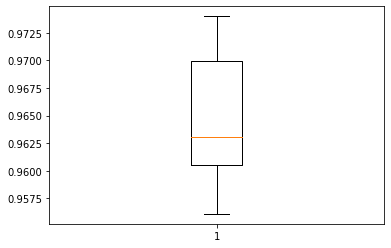

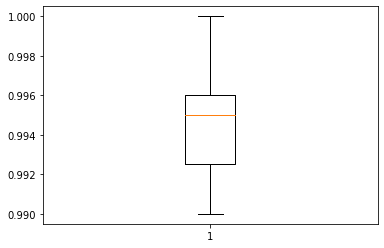

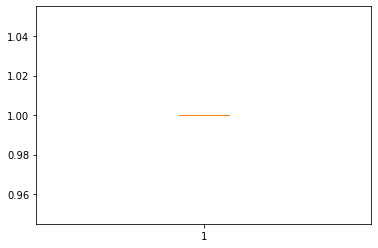

In [15]:
plt.boxplot(a)
plt.show()
plt.boxplot(b)
plt.show()
plt.boxplot(c)
plt.show()

I didn't manage to get the plot with the tutorial you get : 
def plotreg(X_train,X_test,y_test,X,y,p):


def plotreg(X_test,y_test,X,X_train,p):
    for kernel in ('linear', 'rbf', 'poly'):
        clf = svm.SVC(C=p,kernel=kernel, gamma=10)
        clf.fit(X_test, y_test)
        plt.figure()
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
        # Circle out the test data
        plt.scatter(X_train[:, 0], X_train[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')
        plt.axis('tight')
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
        plt.title(kernel)
plt.show()

In [16]:
def plotreg(X,y,X_test,p):
    for kernel in ('linear', 'rbf', 'poly'):
        clf = svm.SVC(C=p,kernel=kernel, gamma=10)
        clf.fit(X, y)

        plt.figure()
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

        # Circle out the test data
        plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

        plt.axis('tight')
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

        plt.title(kernel)
plt.show()

As the 2nd data set have n=3 groups, we can't use the clf.decision_function, so instead of that we use clf.predict

In [17]:
def plotreg3g(X,y,X_test,p):
    for kernel in ('linear', 'rbf', 'poly'):
        clf = svm.SVC(C=p,kernel=kernel, gamma='auto')
        clf.fit(X, y)

        plt.figure()
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

        # Circle out the test data
        plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

        plt.axis('tight')
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        h = 0.1
        
        XX, YY = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'g', 'r'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

        plt.title(kernel)
plt.show()

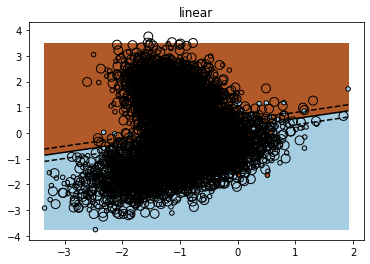

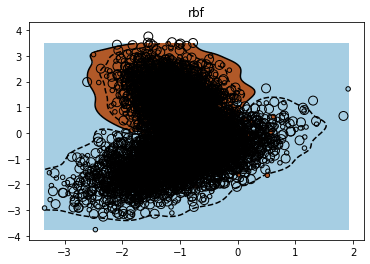

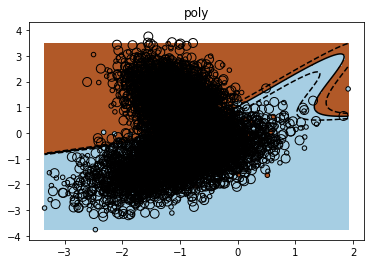

In [10]:
plotreg(X1_v,Y1_v,X1_1,C1)

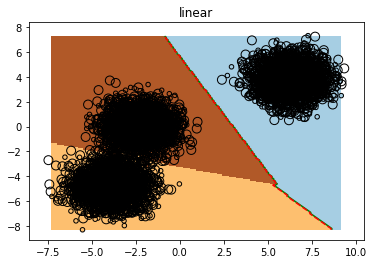

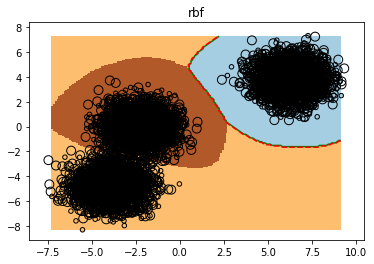

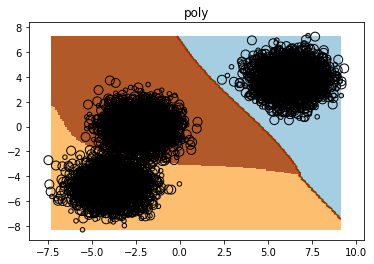

In [18]:
plotreg3g(X2_v,Y2_v,X2_1,C2)

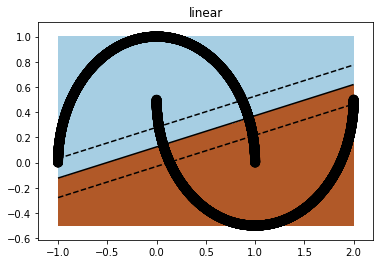

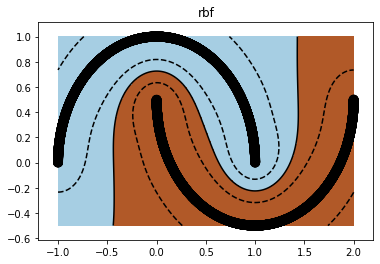

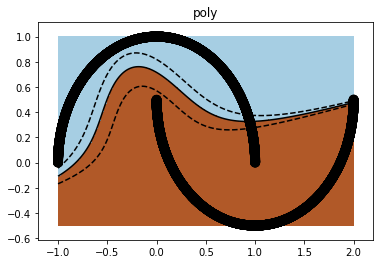

In [19]:
plotreg(X3_v,Y3_v,X3_1,C3)

## 9. What is the role of the support vectors?
In 2D the hyperplane is a line. And when you can have a hyperplane that cut your data intos groups (classify well your datas), its mean that you can have multiple hyperplane.
SVM or Support Vector Machine is a technique of classification for groups which enable to find a good hyperplane.
It uses margin from the hyperplan to the nearest datas points, so, the margin is empty of points.
Support Vector are the nearest points from the hyperplan, that enables to construct the margin.

The best hyperplane is actually the one with the larger margin (in this case, you have less chance to have a wrong classification for a points)

## 10. Running analysis on Diabetic Retinopathy data

In [2]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0],dtype='float')
print(df)

X_df = df.iloc[:,0:18] 
Y_df = df.iloc[:,19]
print(X_df)
print(Y_df)

        0    1     2     3     4     5     6     7          8          9  \
0     1.0  1.0  22.0  22.0  22.0  19.0  18.0  14.0  49.895756  17.775994   
1     1.0  1.0  24.0  24.0  22.0  18.0  16.0  13.0  57.709936  23.799994   
2     1.0  1.0  62.0  60.0  59.0  54.0  47.0  33.0  55.831441  27.993933   
3     1.0  1.0  55.0  53.0  53.0  50.0  43.0  31.0  40.467228  18.445954   
4     1.0  1.0  44.0  44.0  44.0  41.0  39.0  27.0  18.026254   8.570709   
...   ...  ...   ...   ...   ...   ...   ...   ...        ...        ...   
1146  1.0  1.0  34.0  34.0  34.0  33.0  31.0  24.0   6.071765   0.937472   
1147  1.0  1.0  49.0  49.0  49.0  49.0  45.0  37.0  63.197145  27.377668   
1148  1.0  0.0  49.0  48.0  48.0  45.0  43.0  33.0  30.461898  13.966980   
1149  1.0  1.0  39.0  36.0  29.0  23.0  13.0   7.0  40.525739  12.604947   
1150  1.0  1.0   7.0   7.0   7.0   7.0   7.0   5.0  69.423565   7.031843   

             10        11        12        13        14        15        16  \
0      5

In [3]:
def svmdata(n,X,Y):
    accuracy = []
    Cv = []
    for p in np.arange(0.1,10.1,0.1):
            model = svm.SVC(C=p, kernel='rbf',gamma='auto')
            model.fit(X,Y)
            score = cross_val_score(model, X, Y, cv=n,scoring='accuracy')
            accuracy.append(np.mean(score))
            Cv.append(p)        
    print(np.array(accuracy),np.array(Cv))
    return (max(accuracy),Cv[accuracy.index(max(accuracy))])

def vald(n,X,Y,c):
    accuracy = []
    model = svm.SVC(C=c, kernel='rbf',gamma='auto')
    model.fit(X,Y)
    score = cross_val_score(model, X, Y, cv=n,scoring='accuracy')
    accuracy.append((score))
    return (accuracy)

In [4]:
Acd,Cd = (svmdata(2,X_df,Y_df))
print(Acd,Cd)

[0.53084239 0.53084239 0.53084239 0.53084239 0.53258001 0.53258152
 0.54387681 0.55430405 0.55864583 0.5708122  0.58906401 0.58819444
 0.59080163 0.59080012 0.59080012 0.59166969 0.59166969 0.59166969
 0.59253925 0.59253925 0.59253925 0.59253925 0.59253925 0.59340882
 0.59427687 0.59340731 0.59340731 0.59340731 0.59340731 0.59340731
 0.59340731 0.59340731 0.59340731 0.59340731 0.59340731 0.59340731
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536
 0.59427536 0.59427536 0.59427536 0.59427536 0.59427536 0.5942

[array([0.5862069 , 0.6       , 0.55652174, 0.5826087 , 0.5826087 ,
       0.64347826, 0.6       , 0.6       , 0.6173913 , 0.59130435])]


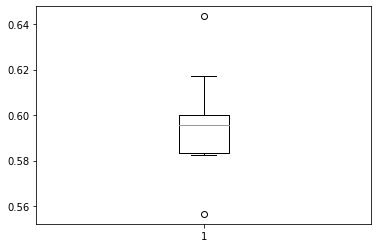

In [5]:
d = vald(10,X_df,Y_df,Cd)
print(d)
plt.boxplot((d))
plt.show()

## 9. Conclusion 

The best parameter for the 3 simulated data sets are :
- With an accuracy of 0.9372030299524847  for a kernel = sbf with C= 5.4 for the 1st data set
- With an accuracy of 0.9931999989119998 for the linear kernel with C =  1.2000000000000002
- With an accuracy of 1.0 a kernel = rbf and C= 0.1 for the 3rd set of data 
Over iterations, I found that it can also be linear for the 2nd data set, but it always rbf for the 3rd one)
My accuracy for the Diabetic Retinopathy data set was 0.59 for 'rbf' kernel at C=2.5
Concerning the data of Diabetic Retinopathy data, I didn't manage to do the 2 Kfold for all kernel on it, it was to long with my computer (indeed, the rbf kernel was pretty fast, the linear kernel took an hour, and I kill the process for the polynomial one after 3h. As I had to run again my code, I decide to show only the rbf kernel)
The number of dimension (n = 20) can explain was it takes so long

The linear kernel is better for data that are linearly separable 
Concerning the rbf, if our data aren't separable in 2D, it is in higher dimension (even infinite, or in case of n-dimension, in smaller dimension)
The polynomial kernel is a linear one, with boundery define as following a polynomial function

We can't visualize our final data, but it can suggest that it not lineary separable

## Comments
As I run my code cell by cell, I had some issue with the optimal parameter in the conclusion. So it's possibile that it will not be the same number as in my code
Moreover, I had some issue with my computer (not very powerfull) so, my plot works the first time (with the function that aren't in comment) but it didn't the last time I run it. So please, can you run the code again if you want 'coherent' data and to have the plot.

Thank you